<a href="https://colab.research.google.com/github/Sylvariane/Analyse-vente/blob/master/P04_02_scriptanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des ventes

## 1. Téléchargement des modules et des fichiers

On importe les différents modules nécessaires à l'analyse des ventes. Ensuite, on importe les fichiers csv crées par le script des données pour les analyser. Les fichiers utilisés dans cette analyse sont générés par le script de nettoyage. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import statsmodels.api as sm
import math

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sells = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sells.csv', parse_dates = True)
prod = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/prod.csv')
custom = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/custom.csv')

## 2. Statistiques descriptives et analyses univariées

On débute cette analyse par la description de nos différents fichiers. Les analyses univariées seront effectuées fichier par fichier avant d'être effectués sur un dataFrame regroupant toutes les informations et crées pour l'occasion. 

### 2.1. Description des clients

#### 2.1.1. Calculs et représentations graphiques

Après avoir chargé le fichier des clients, on réinitie l'index et on modifie le type de la variable 'sex' pour en faire une variable catégorielle. 

In [4]:
custom.reset_index()
custom = custom[['client_id', 'sex', 'birth']]
custom['sex'] = custom['sex'].astype('category')
custom = custom.replace('f', 'F') 
custom = custom.replace('m', 'M')
custom = custom.sort_values('client_id')
print(custom.head())
print(custom.dtypes)

     client_id sex  birth
4298       c_1   M   1955
6893      c_10   M   1956
2137     c_100   M   1992
8471    c_1000   F   1966
3425    c_1001   M   1982
client_id      object
sex          category
birth           int64
dtype: object


On ajoute une colonne 'age' à notre fichier pour pouvoir voir la répartition des âges dans notre fichier client.

In [5]:
custom['age'] = 2022 - custom['birth']
print(custom.head())

     client_id sex  birth  age
4298       c_1   M   1955   67
6893      c_10   M   1956   66
2137     c_100   M   1992   30
8471    c_1000   F   1966   56
3425    c_1001   M   1982   40


On s'intéresse à la répartition des femmes et des hommes dans notre fichier client. 

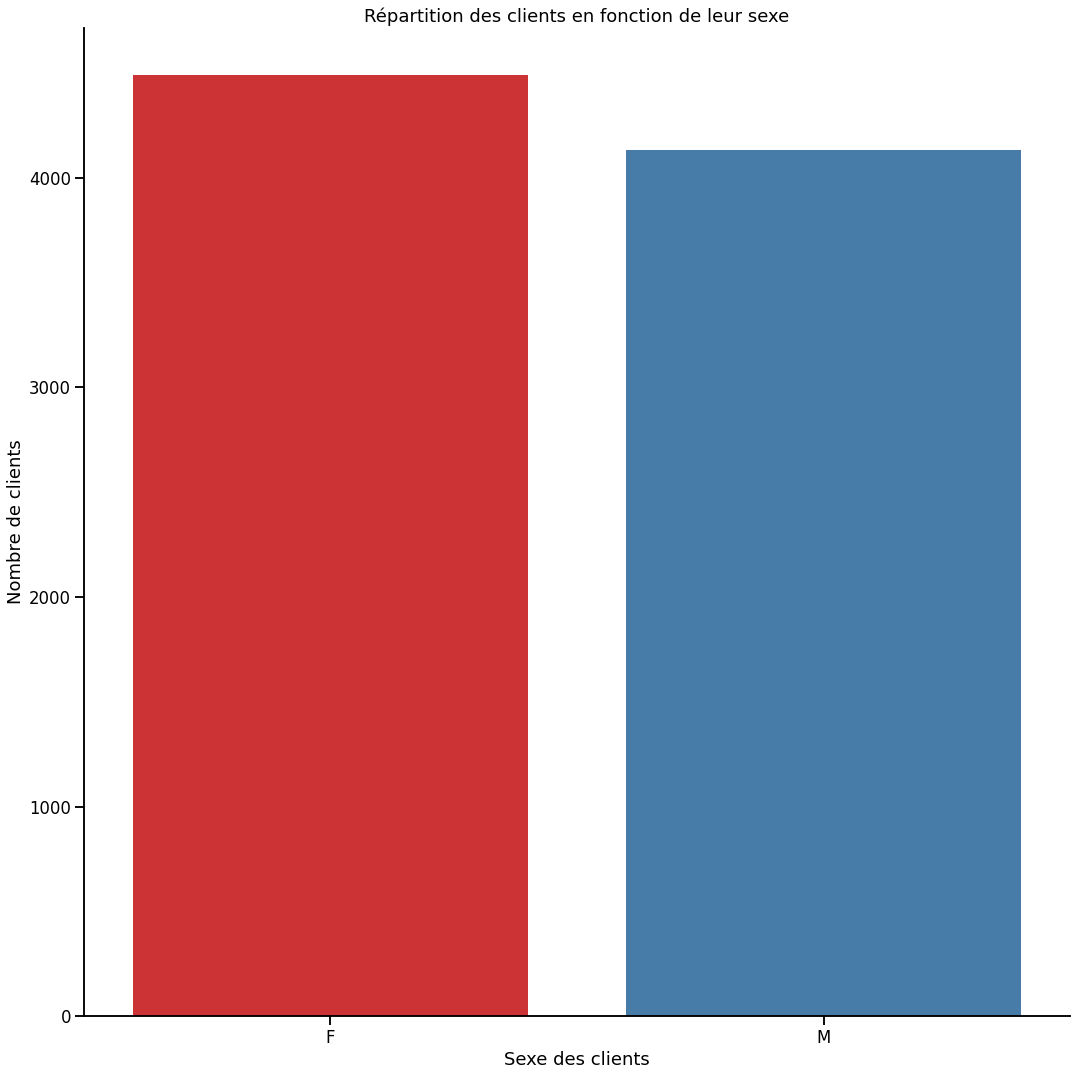

In [6]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('sex', data=custom, kind='count', height=15)
_ = plt.xlabel('Sexe des clients')
_ = plt.ylabel('Nombre de clients')
_ = plt.title('Répartition des clients en fonction de leur sexe')
_ = plt.savefig('1 - Répartition HF.jpg')
_ = plt.show()

Le nombre d'hommes et de femmes est équivalent. On crée deux dataFrames contenant les informations des clients féminins et masculins pour faire d'autres analyses. 

In [7]:
custom_f = custom[custom['sex']=='F']
custom_m = custom[custom['sex']=='M']

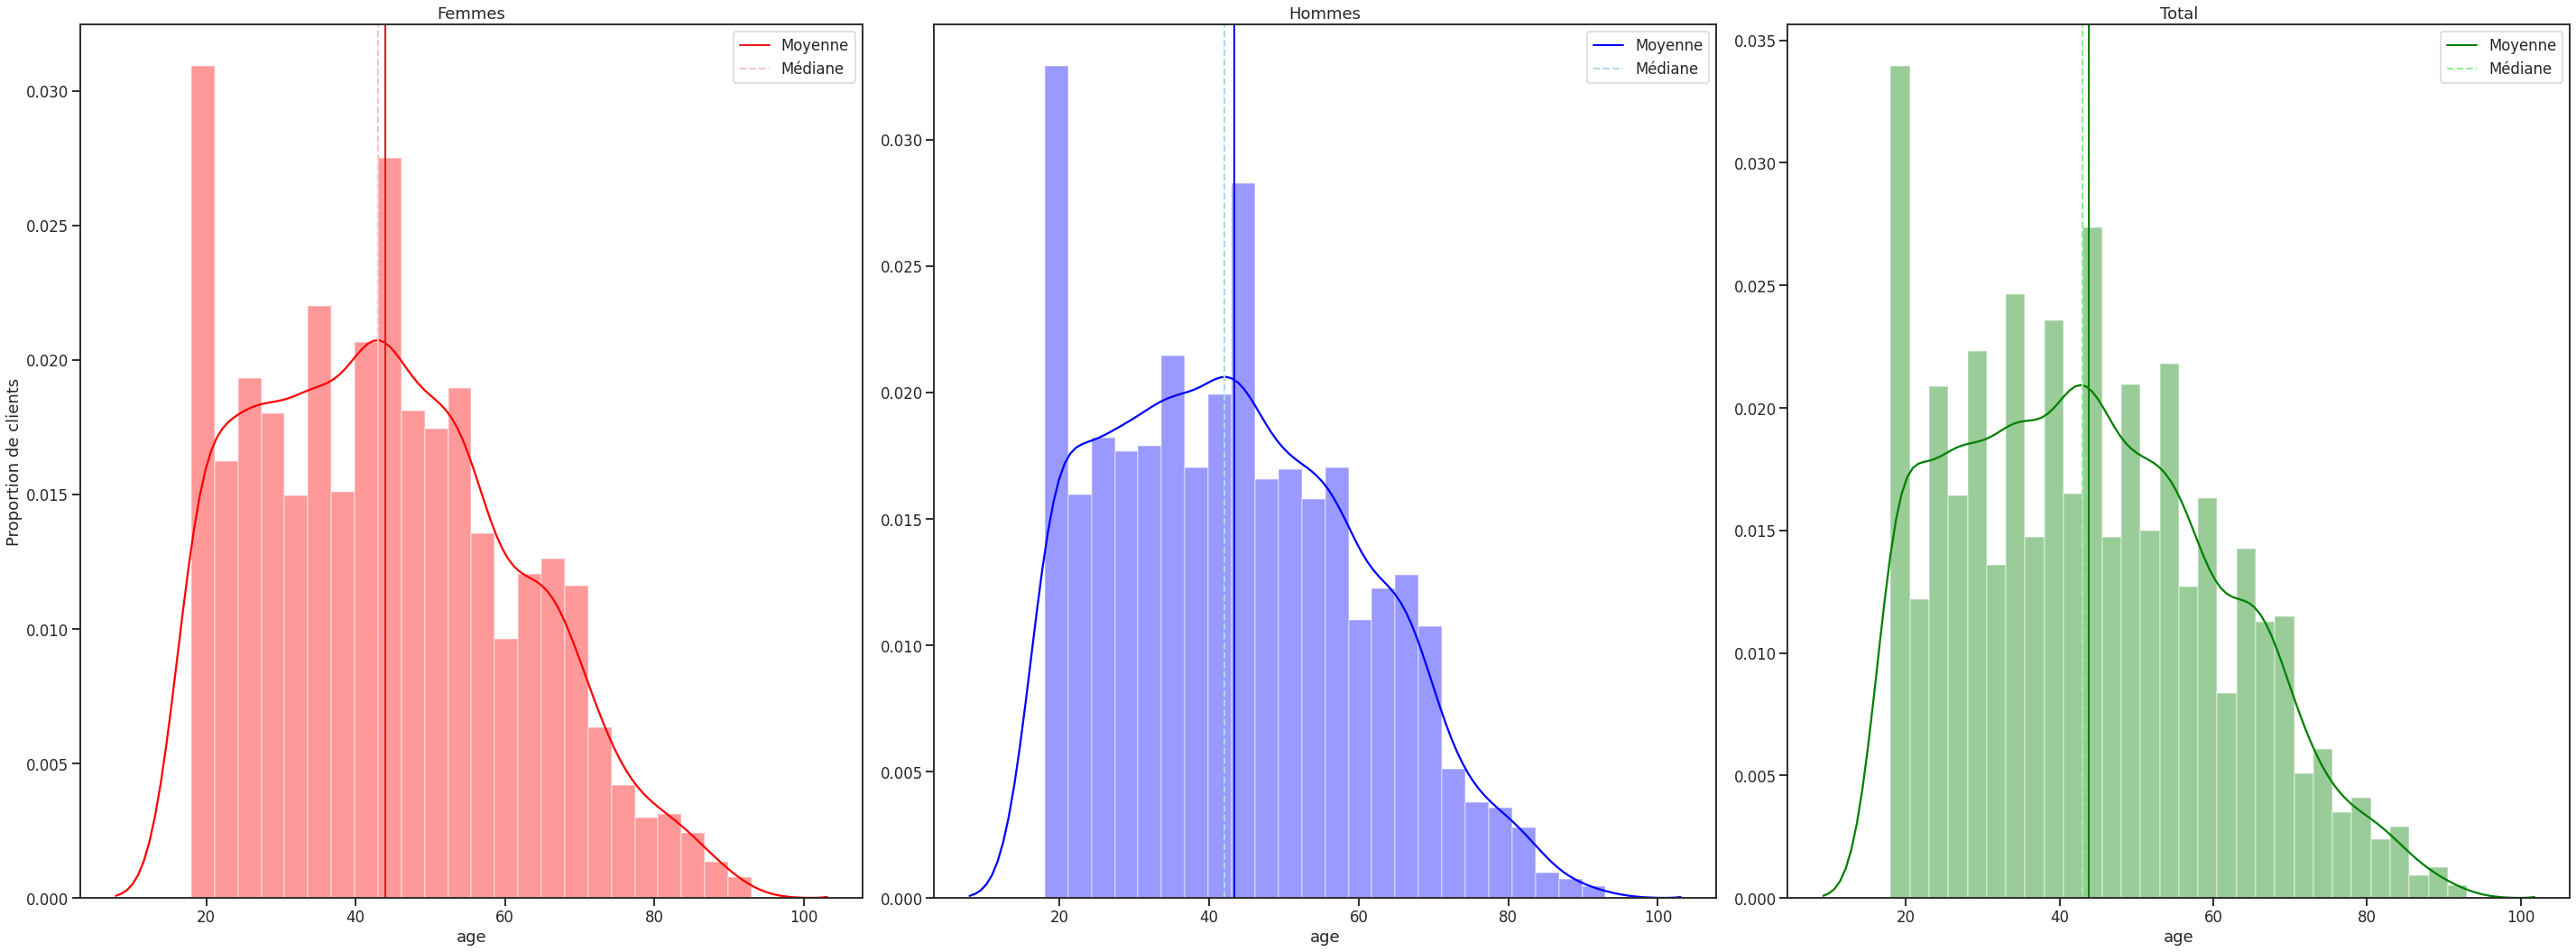

In [8]:
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize = (40,15))

_ = plt.subplot(1, 3, 1)
_ = sns.distplot(custom_f['age'], color='red')
_ = plt.axvline(x=custom_f['age'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=custom_f['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='pink')
_ = plt.ylabel('Proportion de clients')
_ = plt.title('Femmes')
_ = plt.legend()

_ = plt.subplot(1,3,2)
_ = sns.distplot(custom_m['age'], color='blue')
_ = plt.axvline(x=custom_m['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='b')
_ = plt.axvline(x=custom_m['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightblue')
_ = plt.title('Hommes')
_ = plt.legend()

_ = plt.subplot(1,3,3)
_ = sns.distplot(custom['age'], color='green')
_ = plt.axvline(x=custom['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='g')
_ = plt.axvline(x=custom['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightgreen')
_ = plt.title('Total')
_ = plt.legend()

_ = plt.tight_layout()

_ = plt.savefig('2 - Répartitions des âges (HF).jpg')
_ = plt.show()

In [9]:
fem_skew = st.skew(custom_f['age'])
mal_skew = st.skew(custom_m['age'])
skew_total = st.skew(custom['age'])
print('Skewness Femmes = ' + str(fem_skew) + ' ; Skewness Hommes = ' + str(mal_skew) + ' ; Skewness Total = ' + str(skew_total))

Skewness Femmes = 0.3733111568791258 ; Skewness Hommes = 0.3438126359703028 ; Skewness Total = 0.36075109938550914


In [10]:
fem_kurt = st.kurtosis(custom_f['age'])
mal_kurt = st.kurtosis(custom_m['age'])
kurt_total = st.kurtosis(custom['age'])
print('Kurtosis Femmes = ' + str(fem_kurt) + ' ; Kurtosis Hommes = ' + str(mal_kurt) + ' ; Kurtosis Total = ' + str(kurt_total))

Kurtosis Femmes = -0.6122367483683164 ; Kurtosis Hommes = -0.6739856402878859 ; Kurtosis Total = -0.6369914555526575


In [11]:
print(custom_f.describe())
print(custom_m.describe())
print(custom.describe())

             birth          age
count  4490.000000  4490.000000
mean   1977.989755    44.010245
std      17.096698    17.096698
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  4131.000000  4131.000000
mean   1978.586299    43.413701
std      16.718043    16.718043
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1980.000000    42.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  8621.000000  8621.000000
mean   1978.275606    43.724394
std      16.917958    16.917958
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000


#### 2.1.2. Conclusion des différentes analyses

Le fichier client contient 8621 clients. On compte 4490 femmes et 4131 hommes. L'âge moyen des femmes est de 44 ans (std: 17.09 ans) et l'âge moyen des hommes est de 43.4 ans (std: 16.71 ans). La médiane de ces deux échantillons est proche de la moyenne (médiane femme : 43 ans et médiane homme : 42 ans). Les différentes distributions montrent un mode dans la classe \[18-21[\. Ce mode peut s'expliquer par une des limitations du site qui demande un âge minimum de 18 ans pour pouvoir s'inscrire.  Il est possible que des personnes n'ayant pas l'âge minimum s'inscrive en se plaçant dans cette catégorie. 

La distribution est plutôt symétrique. On a donc calculé l'aplatissement des courbes pour voir si la distribution des âges suit une loi normale. Les valeurs du kurtosis sont proches de 0 ce qui signifie que la distribution des âges suit une loi normale avec une tendance à être concentrée. 

## 2.2. Analyse des produits

#### 2.2.1. Calculs et représentation graphique

On réinitie l'index de la table des produits et on modifie le type des catégories. 

In [12]:
prod.reset_index()
prod = prod[['id_prod', 'price', 'categ']]
prod['categ'] = prod['categ'].astype('category')
print(prod.head())
prod.dtypes

  id_prod  price categ
0  0_1421  19.99     0
1  0_1368   5.13     0
2   0_731  17.99     0
3   1_587   4.99     1
4  0_1507   3.99     0


id_prod      object
price       float64
categ      category
dtype: object

On regarde la distribution des prix des produits indépendamment de leur catégorie. 

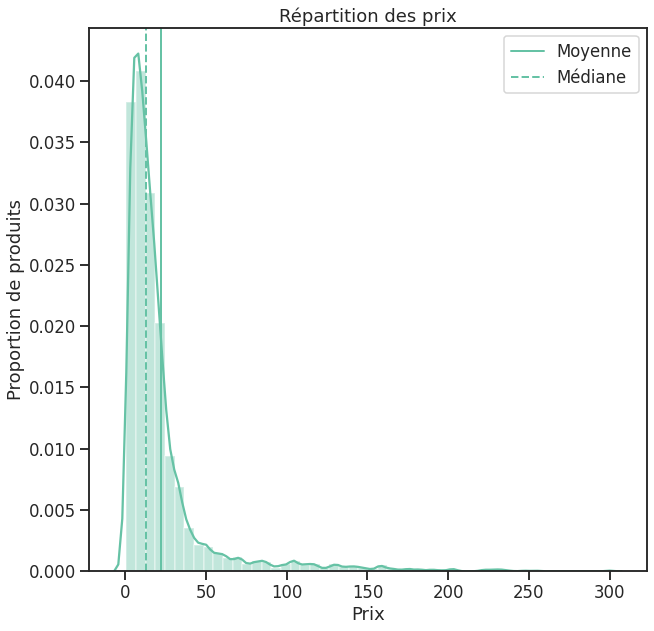

In [13]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = plt.figure(figsize = (10,10))
_ = sns.distplot(prod['price'])
_ = plt.axvline(x=prod['price'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=prod['price'].median(), label='Médiane', linestyle='--', linewidth=2)
_ = plt.xlabel('Prix')
_ = plt.ylabel('Proportion de produits')
_ = plt.title('Répartition des prix')
_ = plt.legend()

_ = plt.savefig('3 - Répartition des produits en fonction du prix.jpg')

_ = plt.show()

In [14]:
prod_skew = st.skew(prod['price'])
print('Skewness des prix : ', prod_skew)

Skewness des prix :  3.797349627243213


In [15]:
print(prod.describe())

             price
count  3287.000000
mean     21.860508
std      29.845769
min       0.620000
25%       6.990000
50%      13.060000
75%      22.990000
max     300.000000


La distribution des valeurs des prix est asymétrique. Le prix moyen des produits est de 21.86€ (std: 29.84€) et la médiane est de 13.07€. La médiane est plus précise que la moyenne dans ce cas car elle n'est pas sensible aux outliers (article à 300€). L'asymétrie vers la gauche des prix montre que la plupart des produits sont petits. 

On s'intéresse ensuite à la répartition des prix en fonction de leurs catégories. 

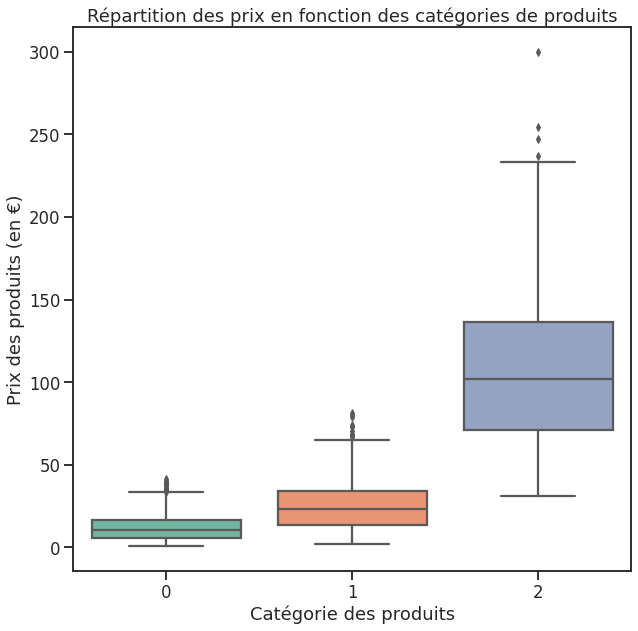

In [16]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=(10,10))

_ = sns.boxplot(data=prod, x='categ', y='price')
_ = plt.xlabel('Catégorie des produits')
_ = plt.ylabel('Prix des produits (en €)')
_ = plt.title('Répartition des prix en fonction des catégories de produits')

_ = plt.savefig('4 - Répartition des prix en fonction des catégories.jpg')

_ = plt.show()

#### 2.2.2. Conclusion

La liste des produits contient 3286 produits. Ces produits sont répartis en trois catégories. La catégorie 0 contient des produits dont le prix maximum est inférieur à 50€, la catégorie 1 contient des produits dont le prix maximum est comprits entre 50 et 100€. Enfin, la catégorie 2 contient des produits dont la valeur médiane est de 100€. 

## 2.3. Analyse des transactions

#### 2.3.1. Calculs et représentations graphiques

On modifie la date pour la transformer en type datetime puis on l'affiche uniquement sous la forme 'année-mois-jour' puis on crée une nouvelle colonne contenant uniquement le mois et l'année. 

In [17]:
sells['date'] = pd.to_datetime(sells['date'])
sells['date'] = sells['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
sells['date'] = pd.to_datetime(sells['date'])
sells['mois-année'] = sells['date'].apply(lambda x: x.strftime("%b %Y"))
sells.head()

,date,id_prod,session_id,client_id,mois-année
0,2021-03-01,0_1259,s_1,c_329,Mar 2021
1,2021-03-01,0_1390,s_2,c_664,Mar 2021
2,2021-03-01,0_1352,s_3,c_580,Mar 2021
3,2021-03-01,0_1458,s_4,c_7912,Mar 2021
4,2021-03-01,0_1358,s_5,c_2033,Mar 2021


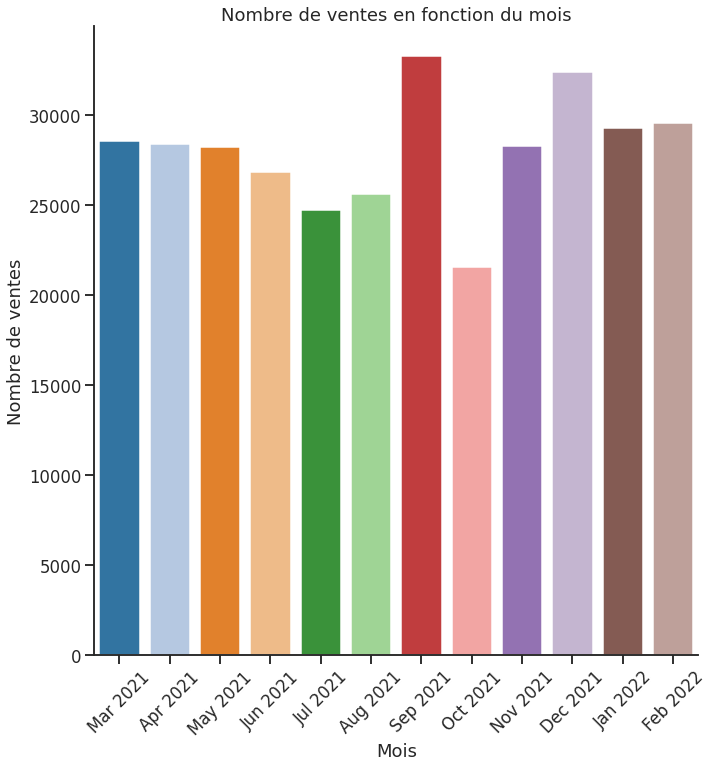

In [18]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('tab20')

_ = sns.catplot('mois-année', data=sells, kind='count', height=10)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes en fonction du mois')

_ = plt.savefig('5 - Nombre de ventes en fonctions du mois.jpg')

plt.show()

On observe une forte baisse des ventes pour le mois d'octobre. 

In [19]:
df = pd.merge(sells, custom, on = 'client_id')
df = pd.merge(df, prod, on = 'id_prod')
sells_ca = df.groupby('mois-année').sum().reset_index()
sells_ca['mois-année'] = pd.to_datetime(sells_ca['mois-année'])
sells_ca = sells_ca.sort_values('mois-année')
sells_ca['cumprice'] = sells_ca['price'].cumsum()
sells_ca = sells_ca[['mois-année', 'price', 'cumprice']]

print(sells_ca)

   mois-année      price      cumprice
7  2021-03-01  479417.42  4.794174e+05
0  2021-04-01  473144.66  9.525621e+05
8  2021-05-01  489461.63  1.442024e+06
6  2021-06-01  481339.91  1.923364e+06
5  2021-07-01  480945.50  2.404309e+06
1  2021-08-01  479410.58  2.883720e+06
11 2021-09-01  502911.80  3.386631e+06
10 2021-10-01  319241.93  3.705873e+06
9  2021-11-01  513007.27  4.218881e+06
2  2021-12-01  523019.65  4.741900e+06
4  2022-01-01  523013.86  5.264914e+06
3  2022-02-01  532869.69  5.797784e+06


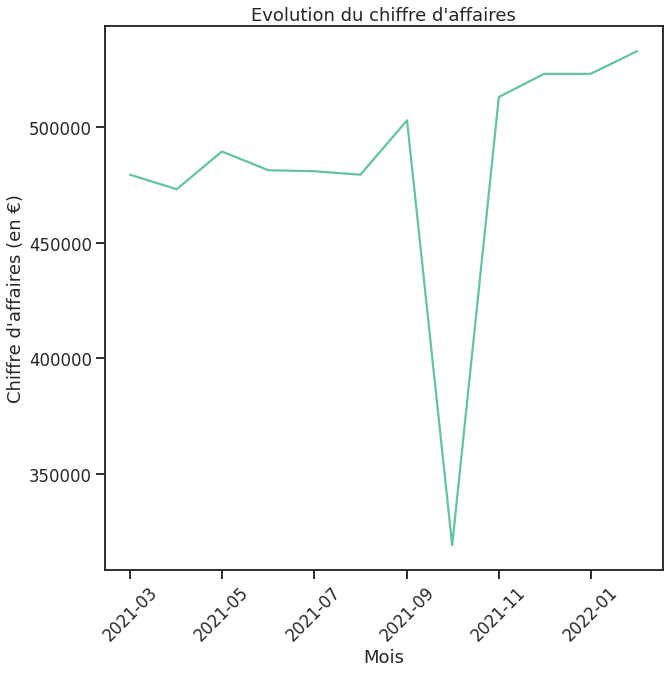

In [20]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

_ = plt.plot(sells_ca['mois-année'], sells_ca['price'])
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Chiffre d\'affaires (en €)')
_ = plt.title('Evolution du chiffre d\'affaires')

_ = plt.savefig('6 - CA mensuel.jpg')

_ = plt.show()

Le chiffres d'affaires chutent brutalement au mois d'octobre. Ces données vont dans le même sens que celle du nombre de ventes. 

In [21]:
sells_sep = sells[sells['mois-année'] == 'Sep 2021']
sells_oct = sells[sells['mois-année'] == 'Oct 2021']
sells_sep_oct= sells_sep.append(sells_oct)
sells_sep_oct = pd.merge(sells_sep_oct, prod, on = 'id_prod')
sells_sep_oct = sells_sep_oct.sort_values('date')
sells_sep_oct = sells_sep_oct.groupby('date').sum()
sells_sep_oct = sells_sep_oct.reset_index()

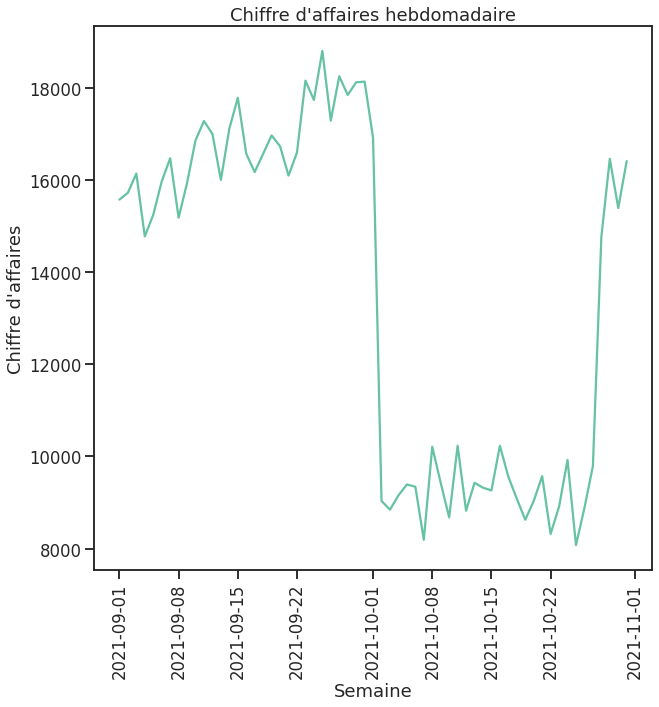

In [22]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

_ = plt.plot(sells_sep_oct['date'], sells_sep_oct['price'])
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Semaine')
_ = plt.ylabel('Chiffre d\'affaires')
_ = plt.title('Chiffre d\'affaires hebdomadaire')

_ = plt.savefig('7 - CA hebdomadaire.jpg')

_ = plt.show()

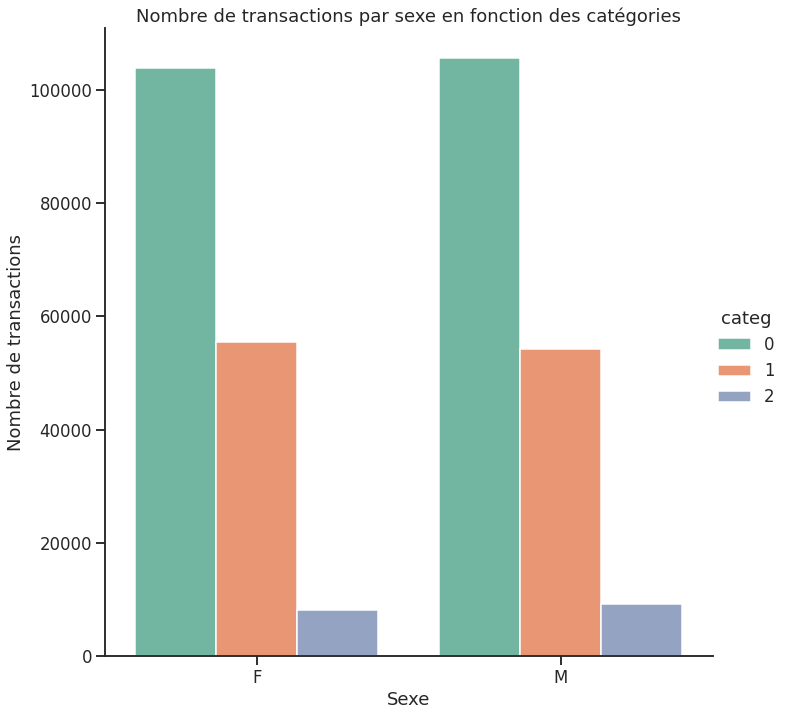

In [23]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = sns.catplot('sex', hue='categ', data=df, kind='count', height=10)
_ = plt.xlabel('Sexe')
_ = plt.ylabel('Nombre de transactions')
_ = plt.title('Nombre de transactions par sexe en fonction des catégories')

_ = plt.savefig('8 - Transactions en fonction catégorie et sexe.jpg')

_ = plt.show()

On observe que le sexe n'a pas d'influence sur les catégories d'achat. Les clients achetent énormément de produits de la catégorie 0 et moins de la catégorie 2.

In [24]:
df_custom = df
df_custom['count'] = 1
df_custom = df.groupby('client_id').sum().reset_index()
df_custom = df_custom.sort_values('count', ascending=False)
df_custom = df_custom[['client_id', 'count']]
df_custom = pd.merge(df_custom, custom, on='client_id')
df_custom = df_custom.sort_values('count', ascending=False)
top_10 = df_custom.iloc[0:10]
print(top_10)

   client_id  count sex  birth  age
0     c_1609  12855   M   1980   42
1     c_6714   4473   F   1968   54
2     c_3454   3275   M   1969   53
3     c_4958   2562   M   1999   23
4     c_2140    195   F   1977   45
5     c_7959    195   F   1974   48
6     c_8026    193   M   1978   44
7     c_2595    193   M   1974   48
8     c_3725    190   F   1980   42
10    c_8392    189   F   1978   44


In [ ]:
df_prod = df
df_prod['count'] = 1
df_prod = df_prod.groupby('id_prod').sum().reset_index()
df_prod = df_prod.sort_values('count', ascending=False)
df_prod = df_prod[['id_prod', 'count']]
df_prod = pd.merge(df_prod, prod, on=['id_prod'])
top_10_prod = df_prod.iloc[0:10]
print(top_10_prod)

  id_prod  count  price categ
0   1_369   1081  23.99     1
1   1_417   1062  20.99     1
2   1_498   1036  23.37     1
3   1_414   1027  23.83     1
4   1_425   1013  16.99     1
5   1_398    952  10.17     1
6   1_406    946  24.81     1
7   1_413    944  17.99     1
8   1_403    939  17.99     1
9   1_407    933  15.99     1


#### 2.3.1. Conclusion

Le nombre de ventes est globalement le même tous les mois. On observe une diminution du nombre de transaction en octobre. Cette diminution s'observe aussi sur le chiffre d'affaires. Mis à part l'incident du mois d'octobre, le chiffre d'affaire est en augmentation constante sur l'année.

Concernant le lien entre les transactions et le sexe des acheteurs, on remarque qu'il n'y a pas de différence. Les clients achètent majoritairement des produits de la catégorie 0 puis ensuite des produits de la catégorie 1 et enfin des produits de la catégorie 2. 

L'analyse du Top 10 des clients montre 4 clients qui se détachent de notre échantillon. En effet, l'un d'eux a effectué 12855 achats et il est suivi par 3 acheteurs ayant effectué plus de 1000 achats.

## 3. Analyse de concentration

In [25]:
df_age = df.groupby('age').sum().reset_index()
df_age['cum_achat'] = df_age['count'].cumsum()

In [26]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df_age['cum_achat'])
print('Indice de Gini : ', gini(X))

Indice de Gini :  0.2961278832632115


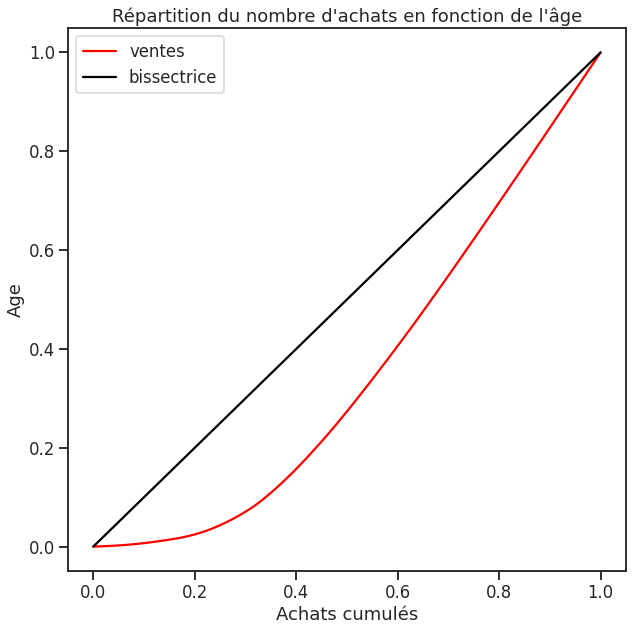

In [27]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
_ = ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', label='ventes')
_ = ax.plot([0,1], [0,1], color='k', label='bissectrice')
_ = plt.xlabel('Achats cumulés')
_ = plt.ylabel('Age')
_ = plt.title('Répartition du nombre d\'achats en fonction de l\'âge')
_ = plt.legend()

_ = plt.savefig('9 - Analyse de concentration.jpg')

_ = plt.show()

L'analyse de concentration montre une évolution non égalitaire des achats cumulés pour presque 40% des achats cumulés. Ensuite, la courbe de Lorenz tend à se rapprocher de la bissectrice qui est signe d'une répartition égalitaire des achats entre les différents âges des clients. L'indice de Gini est proche de 0 (0.30) ce qui signifie que la répartition des achats cumulés est égalitire.

## 4. Analyses bivariées

Plusieurs analyses bivariées ont été réalisés pour mieux comprendre le comportement de nos clients. 

### 4.1. Corrélation entre le sexe des clients et la catégorie des achats

In [28]:
df_categ = df[['sex', 'categ']]
df_categ = df_categ.astype('str')

In [29]:
X = 'sex'
Y = 'categ'
cont = df_categ[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

In [30]:
print(cont)

categ       0       1      2   Total
sex                                 
F      103846   55469   8260  167575
M      105683   54266   9292  169241
Total  209529  109735  17552  336816


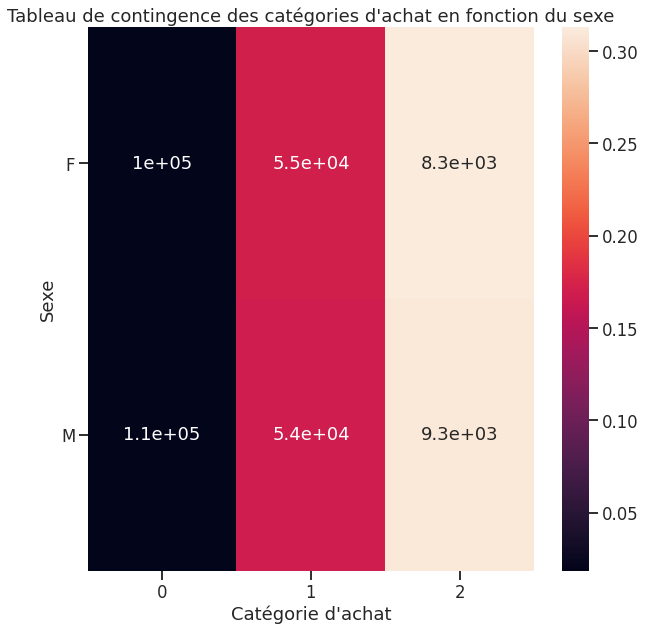

In [31]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Catégorie d\'achat')
_ = plt.ylabel('Sexe')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des catégories d\'achat en fonction du sexe')

_ = plt.savefig('10 - Tableau de contingence catégorie_sexe.jpg')

_ = plt.show()

In [32]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  81.73335807676145
chi-squared : 81.73335807676145
p-value : 1.5659631165658027e-15


Il y a un lien entre le sexe et la catégorie d'achat. En effet, les comportements clients masculins et féminins sont différents. Les femmes vont acheter des produits de catégorie 0 et 2 alors que les hommes vont acheter des produits de catégorie 1.

### 4.2.  Corrélation entre l'âge des clients et le montant total des achats

In [56]:
df_age = df.sort_values('age', ascending=False)
df_age = df_age.groupby('age').mean().reset_index()

In [57]:
df_age.head()

,age,birth,price,count,nb_achat
0,18,2004,40.199780,1,1
1,19,2003,40.541425,1,1
2,20,2002,40.432433,1,1
3,21,2001,41.772382,1,1
4,22,2000,36.832933,1,1


In [58]:
x = df_age['age']
y = df_age['price']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_age['price']
X = df_age[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']
print('r-squared : ', (st.pearsonr(x,y)[0])**2)

rho de pearson : -0.5475913966301478
indice de covariation : -115.85648337898952
r-squared :  0.29985633766335584


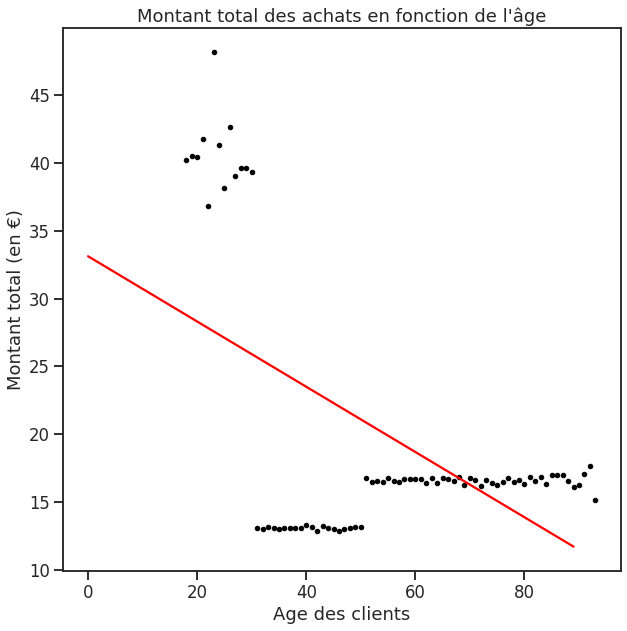

In [59]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_age.age,df_age.price, ".", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Montant total (en €)")
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig('11 - Corrélation age_montant.jpg')

_ = plt.show()

Il y a une corrélation entre l'âge et le montant total des achats. Les clients jeunes dépensent plus que les clients plus âgés. 

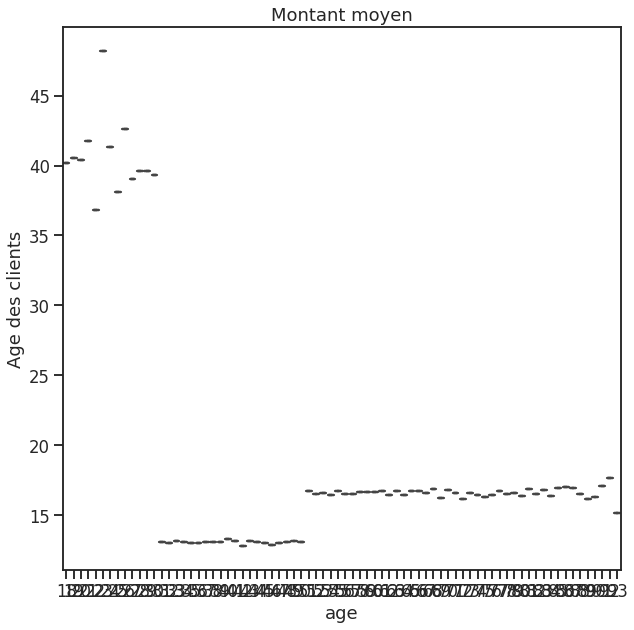

In [61]:
#Définition de classe
18-30
30-50
50+

### 4.3. Corrélation entre l'âge des clients et la fréquence d’achat

In [39]:
df['nb_achat'] = 1
df_freq = df
df_freq = df.groupby(['mois-année', 'age', 'session_id']).sum().reset_index()
df_freq['mois-année'] = pd.to_datetime(df_freq['mois-année']) 
df_freq = df_freq[['mois-année', 'age', 'nb_achat']]
df_freq = df_freq.sort_values(['mois-année', 'age'])
df_freq.head()

,mois-année,age,nb_achat
99862,2021-03-01,18,2
99863,2021-03-01,18,1
99864,2021-03-01,18,6
99865,2021-03-01,18,1
99866,2021-03-01,18,2


In [40]:
x = df_freq['age']
y = df_freq['nb_achat']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_freq['nb_achat']
X = df_freq[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.1775112629151127
indice de covariation : -3.364067748558357
r-squared :  0.03151024846171827


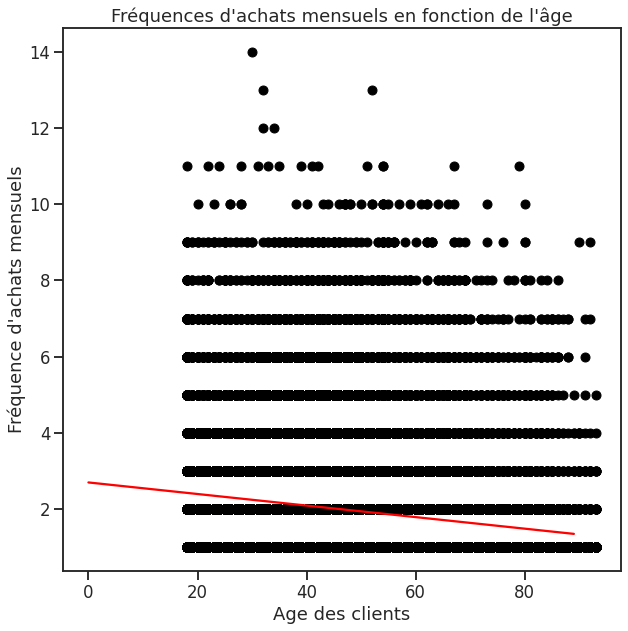

In [41]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_freq.age,df_freq.nb_achat, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Fréquence d'achats mensuels")
_ = plt.title('Fréquences d\'achats mensuels en fonction de l\'âge')

_ = plt.savefig('12 - Corrélation age_freq.jpg')

_ = plt.show()

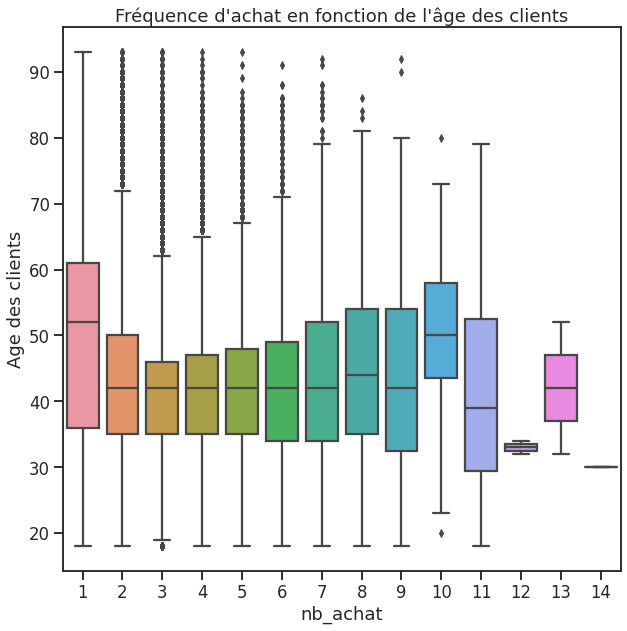

In [47]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='nb_achat', y='age', data=df_freq)
_ = plt.ylabel('Age des clients')
_ = plt.title('Fréquence d\'achat en fonction de l\'âge des clients')

#_ = plt.savefig('14 - corrélation âge_catégories.jpg')

_ = plt.show()

In [ ]:
X = df_freq['nb_achat'] # qualitative
Y = df_freq['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

Il n'y a pas de corrélation entre l'âge des clients et le nombre d'achats moyens par mois. En revanche, on remarque une répartition sous forme de différents nuages de points suggérant une relation non-linéaire.

### 4.4. Corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

In [42]:
pd.set_option('mode.chained_assignment', None)
cols = ['session_id', 'id_prod']
df_pan_count = df[cols]
df_pan_count['count'] = 1
df_pan_count = df_pan_count.sort_values('session_id')
df_pan_count = df_pan_count.groupby('session_id').sum().reset_index()

cols_2 = ['session_id', 'id_prod', 'client_id', 'age']
df_pan_moy = df[cols_2]
df_pan_moy = pd.merge(df_pan_moy, df_pan_count, on = 'session_id')
df_pan_moy.head()

,session_id,id_prod,client_id,age,count
0,s_143748,2_10,c_7754,18,2
1,s_143748,2_101,c_7754,18,2
2,s_63756,1_318,c_5916,18,1
3,s_97777,1_283,c_5716,18,2
4,s_97777,2_112,c_5716,18,2


In [43]:
x = df_pan_moy['age']
y = df_pan_moy['count']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_pan_moy['count']
X = df_pan_moy[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.14110298630410817
indice de covariation : -3.1160976442589865
r-squared :  0.019910052743937336


<Figure size 720x720 with 0 Axes>

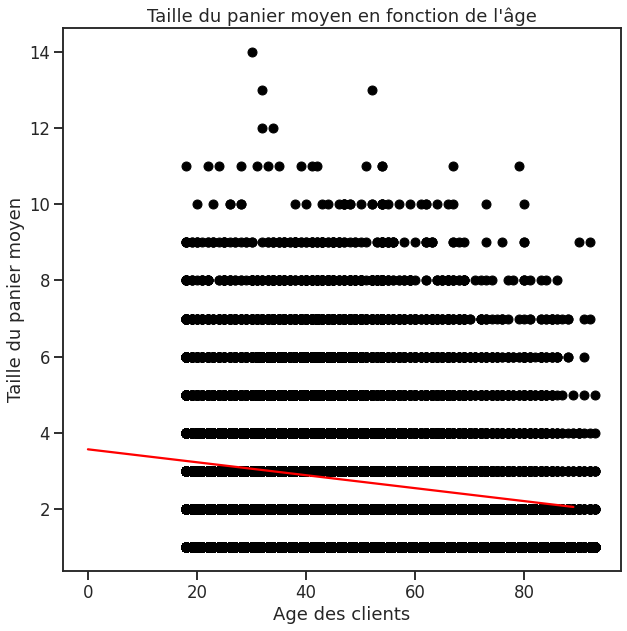

In [44]:
sns.set_context('talk')
sns.set_palette('Set1')
plt.figure(figsize=[10,10])

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_freq.age,df_freq.nb_achat, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Taille du panier moyen")
_ = plt.title('Taille du panier moyen en fonction de l\'âge')

_ = plt.savefig('13 - corrélation panier moyen_age.jpg')

_ = plt.show()

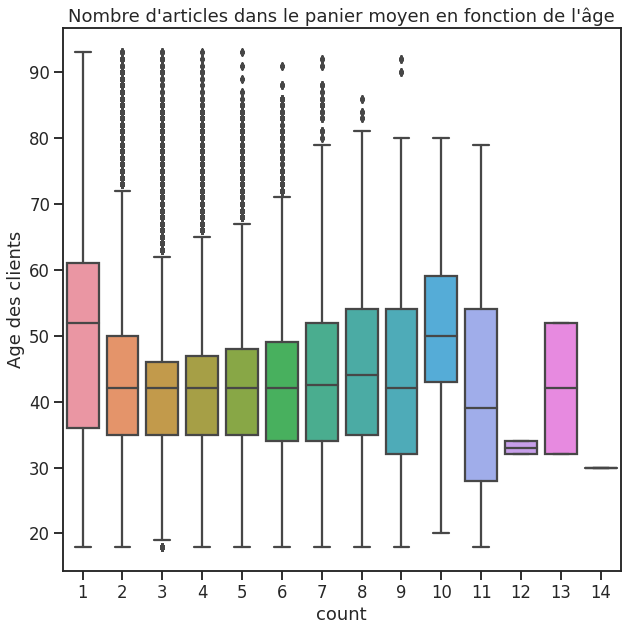

In [48]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='count', y='age', data=df_pan_moy)
_ = plt.ylabel('Age des clients')
_ = plt.title('Nombre d\'articles dans le panier moyen en fonction de l\'âge')

#_ = plt.savefig('14 - corrélation âge_catégories.jpg')

_ = plt.show()

In [50]:
X = df_pan_moy['count'] # qualitative
Y = df_pan_moy['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.049096208142047446
eta-squared : 0.049096208142047446


On observe une corrélation entre l'âge des clients et le nombre d'articles dans le panier. Les clients ayant entre 35 et 60 ans achètent en moyenne un article.

### 4.5. Corrélation entre l'âge des clients et les catégories de produits achetés

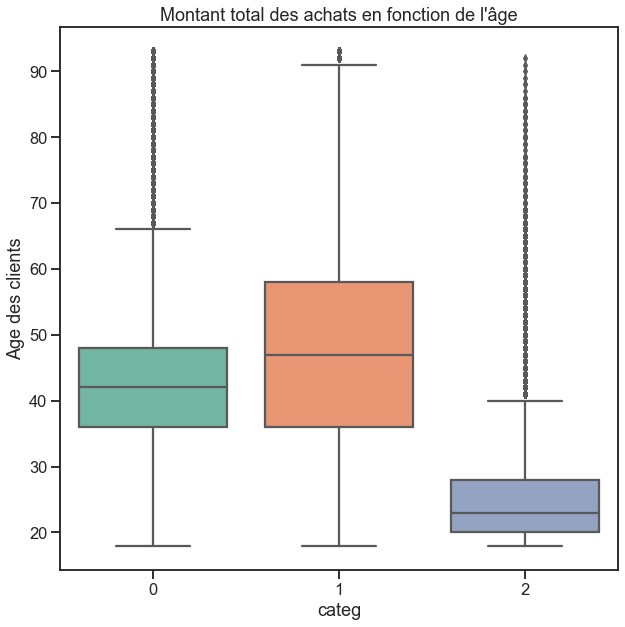

In [ ]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='categ', y='age', data=df)
_ = plt.ylabel('Age des clients')
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig('14 - corrélation âge_catégories.jpg')

_ = plt.show()

In [ ]:
X = df['categ'] # qualitative
Y = df['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.11884029228178536


Le coefficient eta² vaut 0.11. Cela signifie qu'il y a une corrélation entre la catégorie d'achat et l'âge. Les produits de catégorie 0 et 1 vont être achetés par tous les clients. En effet, l'âge moyen des acheteurs correspond à l'âge moyen de notre fichier client. En revanche, les produits de la catégorie 2 vont être essentiellement achetés par des clients plus jeunes (moyenne d'âge : 24 ans).